In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.0/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 1.6/150.0 MB 2.1 MB/s eta 0:01:11
    --------------------------------------- 2.1/150.0 MB 2.2 MB/s eta 0:01:07
    --------------------------------------- 3.1/150.0 MB 2.5 MB/s eta 0:00:59
   - -------------------------------------- 3.9/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 4.2/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 5.8/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 7.1/150.0 MB 3.3 MB/s eta 0:00:43
   -- ------------------------------------- 7.9/150.0 MB 3.3 MB/s eta 0:00:43
   -- ------------------------------------- 9.4/150.0 MB 3.6 MB/s eta 0:00:39


In [2]:
# ------------------------------------------------------------------
# Financial Fraud Detection Project
# Part 1: Data Acquisition & Preprocessing
# Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
# ------------------------------------------------------------------

# 1. Import necessary libraries
import pandas as pd
import numpy as np

print("Libraries imported successfully.")

# ------------------------------------------------------------------
# Step 1: Data Acquisition & Initial Exploration (ETL - Extract & Transform)
# ------------------------------------------------------------------

# Define the path to your dataset
# This assumes the CSV file is in the same directory as the script.
file_path = "C:\\Users\\Sabahath Taj\\Downloads\\creditcard_2023.csv\\creditcard_2023.csv"

# Load the dataset using a try-except block for robust error handling
try:
    df = pd.read_csv("C:\\Users\\Sabahath Taj\\Downloads\\creditcard_2023.csv\\creditcard_2023.csv")
    print(f"Dataset '{"C:\\Users\\Sabahath Taj\\Downloads\\creditcard_2023.csv\\creditcard_2023.csv"}' loaded successfully.")
    print("Shape of the raw dataset:", df.shape)
except FileNotFoundError:
    print(f"Error: '{"C:\\Users\\Sabahath Taj\\Downloads\\creditcard_2023.csv\\creditcard_2023.csv"}' not found.")
    print("Please make sure the dataset is downloaded from Kaggle and placed in the same directory as this script.")
    exit()

# --- Initial Transformation and Exploration ---

# Display the first 5 rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# The 'id' column is just a row identifier and provides no predictive value.
# It's good practice to remove it.
print("\nDropping the unnecessary 'id' column...")
df.drop('id', axis=1, inplace=True)
print("'id' column dropped. New shape:", df.shape)

# Get a concise summary of the dataframe (data types, non-null counts)
print("\nDataset Information:")
df.info()

# Get descriptive statistics for a deeper look at the data distributions
print("\nDescriptive Statistics:")
print(df.describe())

# Check the distribution of the target variable 'Class'
# 0 = Legitimate, 1 = Fraudulent
print("\nDistribution of Target Variable ('Class'):")
print(df['Class'].value_counts())
# This specific dataset is known to be balanced, which is great for training.

# ------------------------------------------------------------------
# Step 2: Handle Missing Values
# ------------------------------------------------------------------

# Check for any missing values across the entire dataframe
print("\nChecking for missing values...")
missing_values_count = df.isnull().sum().sum()

if missing_values_count == 0:
    print("No missing values found in the dataset. No imputation needed.")
else:
    print(f"Found {missing_values_count} missing values. Handling them...")
    # If there were missing values, you would apply a strategy here. For example:
    # df.fillna(df.median(), inplace=True) # Impute with the median
    
# ------------------------------------------------------------------
# Step 3: Apply Data Normalization Techniques
# ------------------------------------------------------------------

# According to the dataset's description on Kaggle, all features,
# including 'Amount', have already been scaled (likely using StandardScaler).
# We can confirm this by looking at the mean (close to 0) and std dev (close to 1)
# in the df.describe() output above.
# Therefore, an explicit normalization step is not required for this dataset.

print("\nSkipping Data Normalization: Features are already pre-scaled.")

# ------------------------------------------------------------------
# Step 4: Feature Engineering
# ------------------------------------------------------------------
# Feature engineering creates new features from existing ones to help the model
# capture more complex patterns. With anonymized 'V' features, we can create
# interaction features as an example.

print("\nPerforming feature engineering...")

# Example 1: Create an interaction feature between V1 and V2
# This might help capture relationships that are not apparent from the individual features.
df['V1_V2_interaction'] = df['V1'] * df['V2']

# Example 2: Create a feature representing the sum of several key 'V' features.
# The choice of features would ideally be based on initial model results or domain knowledge.
# Here, we'll just pick a few for demonstration.
df['V_feature_sum'] = df['V3'] + df['V4'] + df['V5']

print("Feature engineering complete. Two new features added: 'V1_V2_interaction' and 'V_feature_sum'.")
print("\nDataset preview after adding new features:")
print(df.head())

# ------------------------------------------------------------------
# ETL - Load: Save the preprocessed data to a new file
# ------------------------------------------------------------------
# This is the final "Load" step. The clean, transformed data is saved
# and will be the input for the next stage (Model Training).

output_file = 'processed_transactions_2023.csv'
df.to_csv(output_file, index=False)

print(f"\nPreprocessing is complete!")
print(f"The clean and engineered data has been saved to the file: '{output_file}'")
print("This file is now ready for Part 2: Model Training.")

Libraries imported successfully.
Dataset 'C:\Users\Sabahath Taj\Downloads\creditcard_2023.csv\creditcard_2023.csv' loaded successfully.
Shape of the raw dataset: (568630, 31)

First 5 rows of the dataset:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   


In [2]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00


Libraries imported successfully.
Preprocessed dataset loaded successfully.
Data split complete. Training set has 454904 records.

--- Training and Evaluating Logistic Regression ---
Accuracy: 0.9642

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       0.95      0.98      0.96     56863
     Fraud (1)       0.98      0.95      0.96     56863

      accuracy                           0.96    113726
     macro avg       0.96      0.96      0.96    113726
  weighted avg       0.96      0.96      0.96    113726



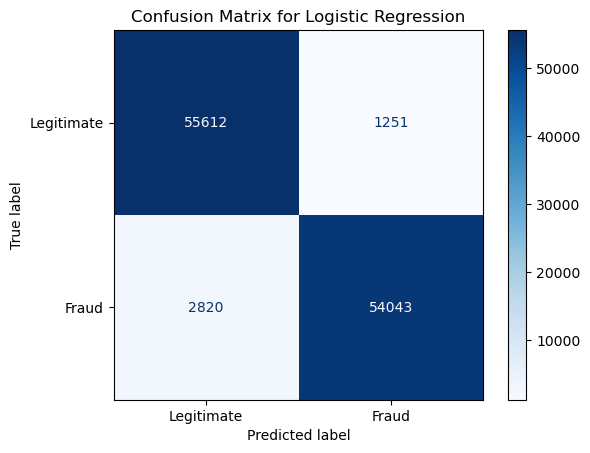


--- Training and Evaluating Random Forest ---
Accuracy: 0.9998

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56863
     Fraud (1)       1.00      1.00      1.00     56863

      accuracy                           1.00    113726
     macro avg       1.00      1.00      1.00    113726
  weighted avg       1.00      1.00      1.00    113726



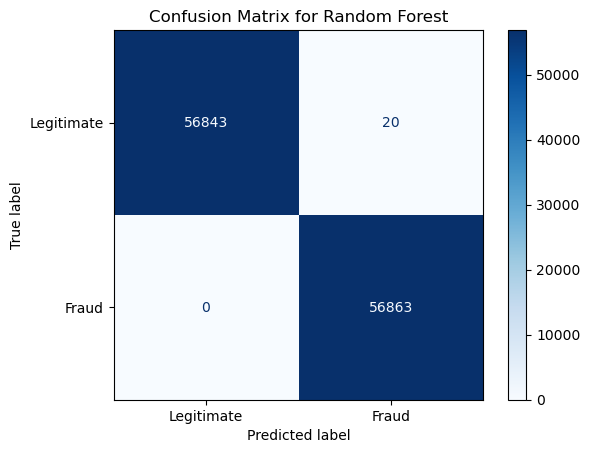


--- Training and Evaluating XGBoost ---
Accuracy: 0.9997

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56863
     Fraud (1)       1.00      1.00      1.00     56863

      accuracy                           1.00    113726
     macro avg       1.00      1.00      1.00    113726
  weighted avg       1.00      1.00      1.00    113726



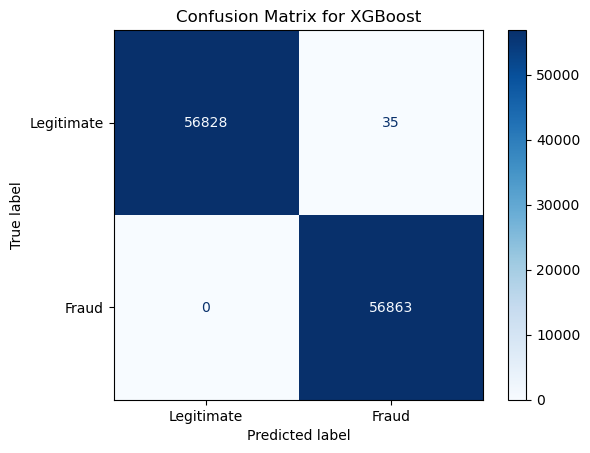


--- Training and Evaluating LightGBM ---
[LightGBM] [Info] Number of positive: 227452, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.269054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9990

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56863
     Fraud (1)       1.00      1.00      1.00     56863

      accuracy                           1.00    113726
     macro avg       1.00      1.00      1.00    113726
  weighted avg       1.00      1.00      1.00    113726



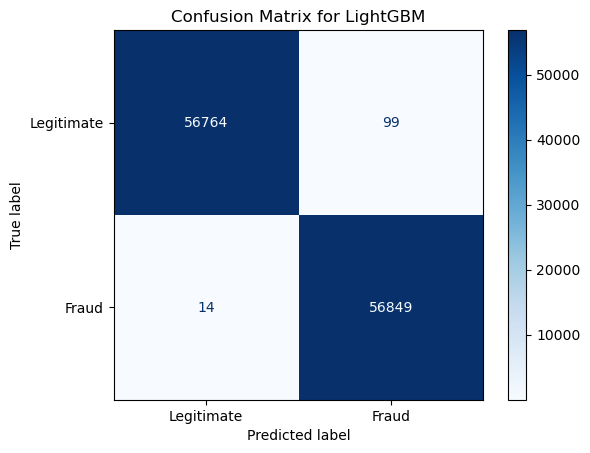


--- Final Model Comparison ---
                 Model  Accuracy
1        Random Forest  0.999824
2              XGBoost  0.999692
3             LightGBM  0.999006
0  Logistic Regression  0.964203


In [3]:
# ------------------------------------------------------------------
# Financial Fraud Detection - Part 2A: Supervised Learning Models
# ------------------------------------------------------------------

# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

# ------------------------------------------------------------------
# Step 1: Load the Preprocessed Data
# ------------------------------------------------------------------
try:
    df = pd.read_csv('processed_transactions_2023.csv')
    print("Preprocessed dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'processed_transactions_2023.csv' not found.")
    exit()

# ------------------------------------------------------------------
# Step 2: Prepare Data (Features and Target) and Split
# ------------------------------------------------------------------
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into 80% training and 20% testing sets
# stratify=y ensures the class distribution is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split complete. Training set has {X_train.shape[0]} records.")

# ------------------------------------------------------------------
# Step 3: Train and Evaluate Models
# ------------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate and store results
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Fraud (1)']))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraud'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# ------------------------------------------------------------------
# Step 4: Compare Model Performance
# ------------------------------------------------------------------
print("\n--- Final Model Comparison ---")
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df.sort_values('Accuracy', ascending=False))

In [1]:
# -----------------------------------------------------------------------
# Financial Fraud Detection - Part B: Unsupervised Anomaly Detection
# -----------------------------------------------------------------------
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

# 1. Load Data
df = pd.read_csv('processed_transactions_2023.csv')
X = df.drop('Class', axis=1)
y_true = df['Class'] # Used only for evaluation

# --- 2. Model 1: Isolation Forest ---
print("\n--- Training Isolation Forest ---")
# 'contamination' is the expected proportion of anomalies. Since our data is 50% fraud, we set it to 0.5.
iso_forest = IsolationForest(contamination=0.5, random_state=42, n_jobs=-1)
y_pred_iso = iso_forest.fit_predict(X)

# Convert predictions: -1 (anomaly/fraud) becomes 1, and 1 (inlier/normal) becomes 0.
y_pred_iso_mapped = [1 if x == -1 else 0 for x in y_pred_iso]

print("\nClassification Report (Isolation Forest):")
print(classification_report(y_true, y_pred_iso_mapped, target_names=['Legitimate', 'Fraud']))

# --- 3. Model 2: One-Class SVM ---
# Note: This is extremely slow on large datasets. We will run it on a small sample.
print("\n--- Training One-Class SVM (on a 5% sample) ---")
df_sample = df.sample(frac=0.05, random_state=42)
X_sample = df_sample.drop('Class', axis=1)
y_true_sample = df_sample['Class']

# 'nu' is an upper bound on the fraction of training errors. 0.5 is suitable for 50/50 data.
one_class_svm = OneClassSVM(nu=0.5, kernel='rbf', gamma='auto')
y_pred_svm = one_class_svm.fit_predict(X_sample)

# Convert predictions
y_pred_svm_mapped = [1 if x == -1 else 0 for x in y_pred_svm]

print("\nClassification Report (One-Class SVM):")
print(classification_report(y_true_sample, y_pred_svm_mapped, target_names=['Legitimate', 'Fraud']))

Libraries imported successfully.

--- Training Isolation Forest ---

Classification Report (Isolation Forest):
              precision    recall  f1-score   support

  Legitimate       0.58      0.58      0.58    284315
       Fraud       0.58      0.58      0.58    284315

    accuracy                           0.58    568630
   macro avg       0.58      0.58      0.58    568630
weighted avg       0.58      0.58      0.58    568630


--- Training One-Class SVM (on a 5% sample) ---

Classification Report (One-Class SVM):
              precision    recall  f1-score   support

  Legitimate       0.56      0.56      0.56     14220
       Fraud       0.56      0.55      0.56     14212

    accuracy                           0.56     28432
   macro avg       0.56      0.56      0.56     28432
weighted avg       0.56      0.56      0.56     28432



In [1]:
!pip install tensorflow 

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.1

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x000001E86AED3D40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))



In [3]:
# This code block ensures installation into the correct environment
import sys
!{sys.executable} -m pip install tensorflow

# You can also add other packages if they are missing
# !{sys.executable} -m pip install pandas scikit-learn matplotlib seaborn

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.1

ERROR: Exception:
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\ssl.py", line 1251, in recv_int

Libraries imported successfully.
Dataset loaded successfully.
PCA will be trained on 284315 normal transactions.
PCA model trained on the structure of normal transactions using 15 components.


C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


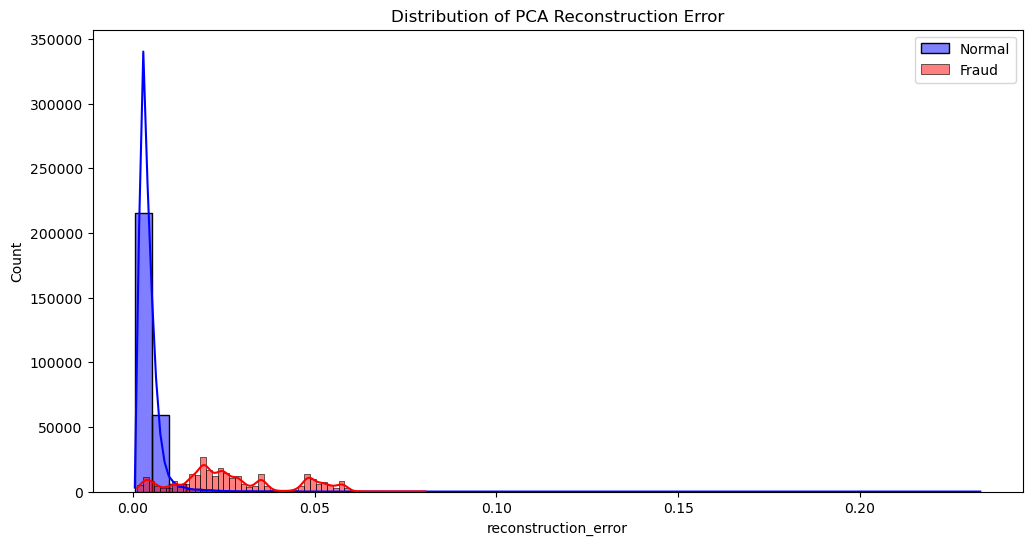


Chosen Threshold for Anomaly Detection (95th percentile of normal error): 0.0086

Classification Report (PCA Anomaly Detection):
                precision    recall  f1-score   support

Legitimate (0)       0.90      0.95      0.92    284315
     Fraud (1)       0.95      0.89      0.92    284315

      accuracy                           0.92    568630
     macro avg       0.92      0.92      0.92    568630
  weighted avg       0.92      0.92      0.92    568630



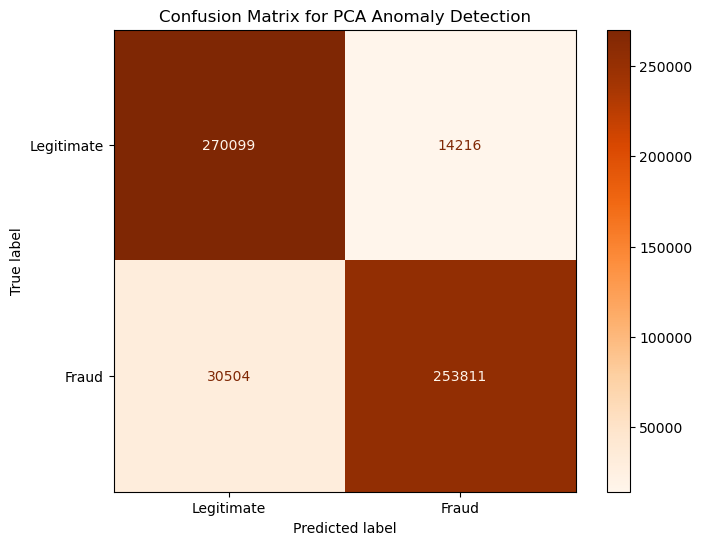

In [1]:
# ------------------------------------------------------------------
# Financial Fraud Detection - Alternative to Deep Learning Autoencoder
# Anomaly Detection using PCA Reconstruction Error
# ------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

# ------------------------------------------------------------------
# 1. Load and Prepare Data
# ------------------------------------------------------------------
try:
    df = pd.read_csv('processed_transactions_2023.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'processed_transactions_2023.csv' not found. Please run the preprocessing script first.")
    exit()

# Separate the features (X) from the target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# PCA is sensitive to scaling, so we'll scale data to a [0, 1] range.
# This is a good practice even if data is already standardized.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# The key idea: Train the PCA model ONLY on legitimate transactions.
# We create a new dataframe from the scaled data for this purpose.
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
normal_df_scaled = X_scaled_df[y == 0]
print(f"PCA will be trained on {len(normal_df_scaled)} normal transactions.")

# ------------------------------------------------------------------
# 2. Build and "Train" the PCA Model
# ------------------------------------------------------------------
# We choose a number of components that is less than the total number of features.
# This forces the PCA to learn a compressed representation.
n_components = 15 
pca = PCA(n_components=n_components, random_state=42)

# "Train" the PCA model by fitting it ONLY on the normal data
pca.fit(normal_df_scaled)
print(f"PCA model trained on the structure of normal transactions using {n_components} components.")

# ------------------------------------------------------------------
# 3. Calculate Reconstruction Error
# ------------------------------------------------------------------
# Step 1: Transform the ENTIRE dataset into the lower-dimensional PCA space.
X_pca = pca.transform(X_scaled)

# Step 2: Inverse transform it back to the original feature space.
X_reconstructed = pca.inverse_transform(X_pca)

# Step 3: Calculate the reconstruction error (Mean Absolute Error) for every transaction.
reconstruction_error = np.mean(np.abs(X_scaled - X_reconstructed), axis=1)

# Step 4: Create a new dataframe with the error and the true class label.
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_error,
    'true_class': y
})

# ------------------------------------------------------------------
# 4. Evaluate the Results
# ------------------------------------------------------------------
# Visualize the error distributions for normal vs. fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=error_df[error_df['true_class'] == 0], x='reconstruction_error', color="blue", label="Normal", bins=50, kde=True)
sns.histplot(data=error_df[error_df['true_class'] == 1], x='reconstruction_error', color="red", label="Fraud", bins=50, kde=True)
plt.title('Distribution of PCA Reconstruction Error')
plt.legend()
plt.show()

# Set a threshold for what's considered an anomaly.
# A common practice is to use a percentile of the normal data's error.
threshold = error_df[error_df['true_class'] == 0]['reconstruction_error'].quantile(0.95)
print(f"\nChosen Threshold for Anomaly Detection (95th percentile of normal error): {threshold:.4f}")

# Classify transactions based on whether their error is above the threshold
y_pred = (error_df['reconstruction_error'] > threshold).astype(int)

# --- Print the Classification Report ---
print("\nClassification Report (PCA Anomaly Detection):")
print(classification_report(error_df['true_class'], y_pred, target_names=['Legitimate (0)', 'Fraud (1)']))

# --- Display the Confusion Matrix ---
cm = confusion_matrix(error_df['true_class'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraud'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix for PCA Anomaly Detection')
plt.show()

Libraries imported successfully.

Generating synthetic transactional data...
Injecting a 'fraud ring' pattern into the data...
Total transactions (legitimate + fraudulent): 1050

Building transaction graph...
Graph created with 184 nodes and 902 edges.
Visualizing the graph... Look for a dense, separate cluster of red nodes.


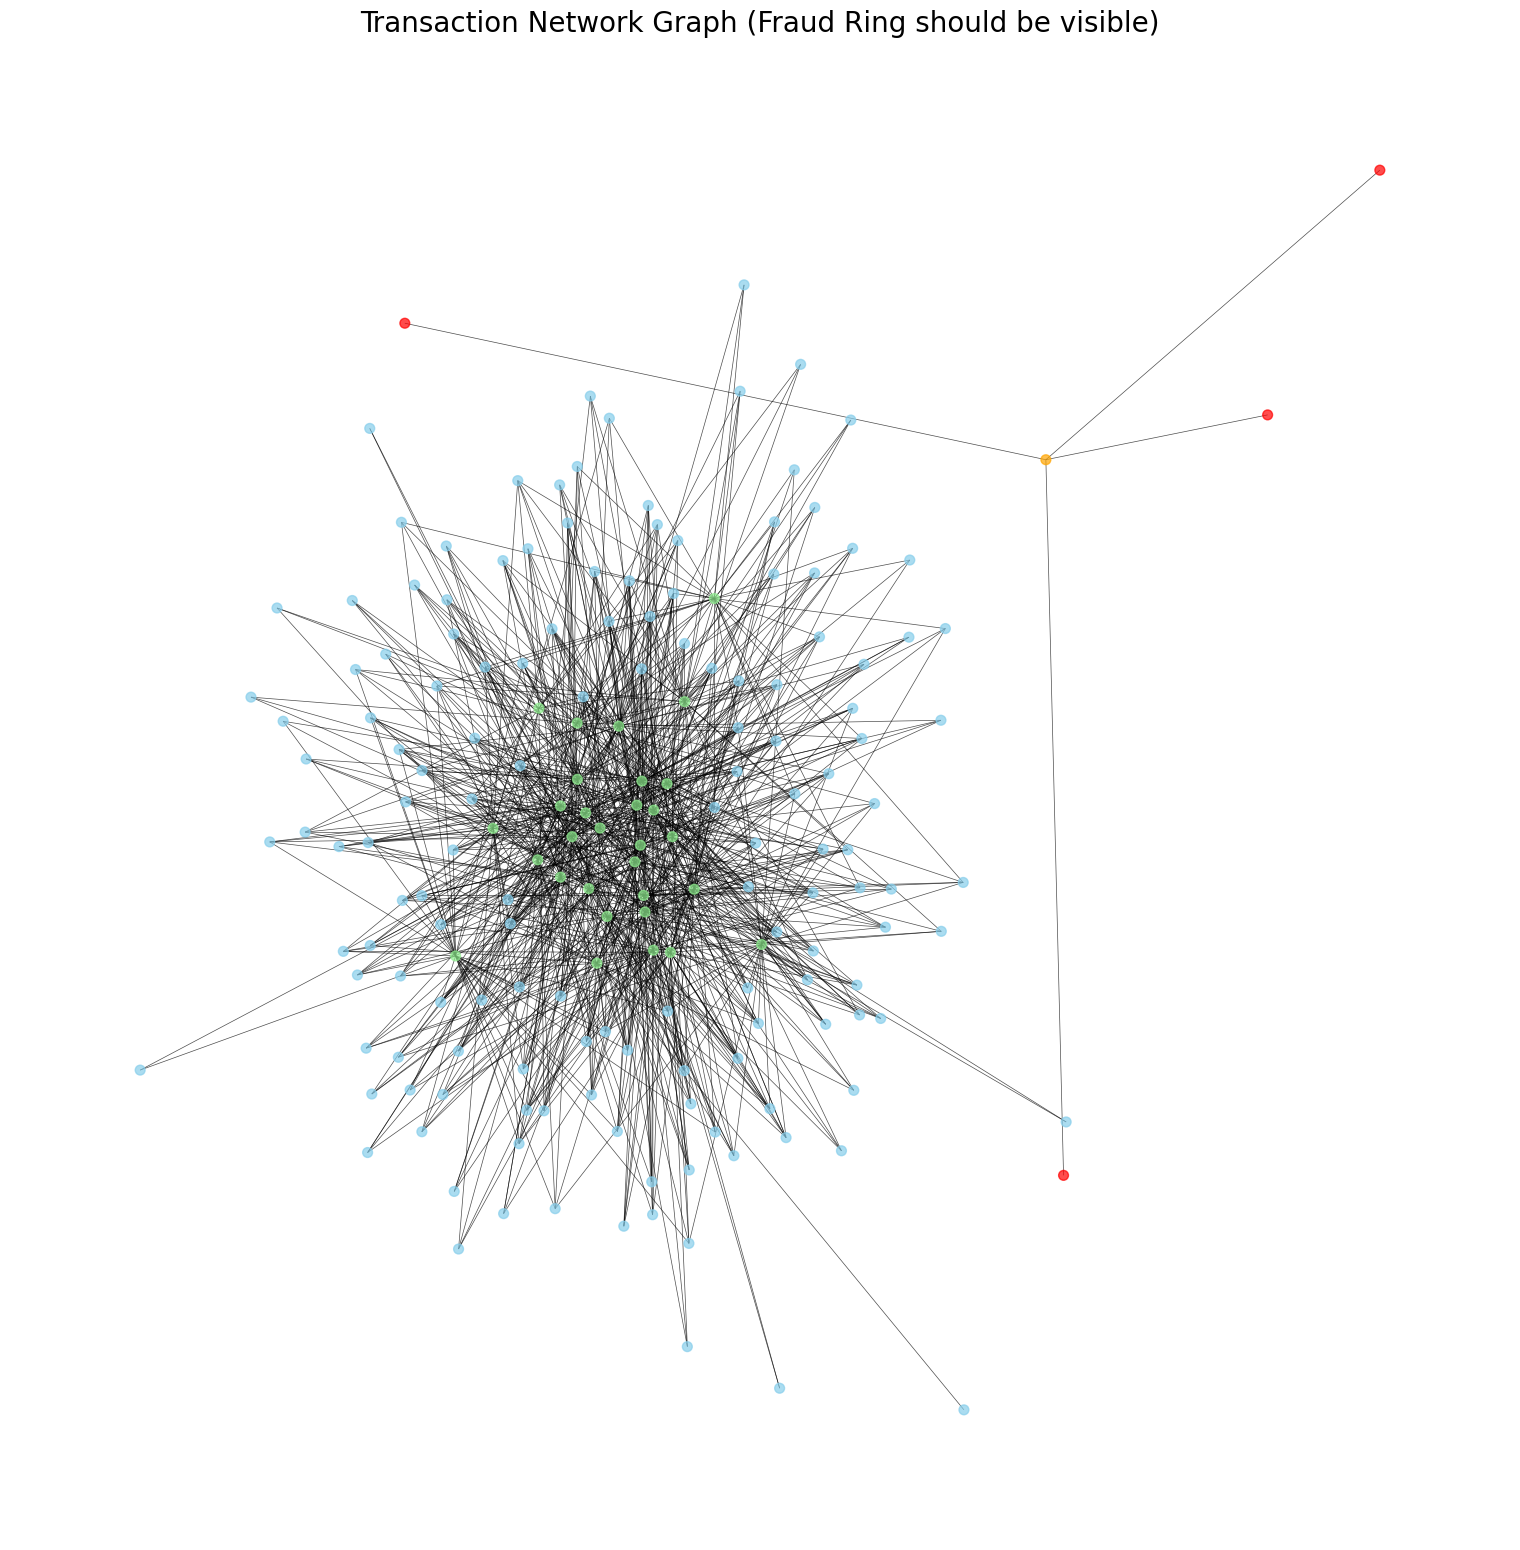


Programmatically detecting suspicious communities...
Found 2 distinct communities in the graph.


In [1]:
# ------------------------------------------------------------------
# Financial Fraud Detection - Part D: Graph-Based Analysis
# ------------------------------------------------------------------
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

# ------------------------------------------------------------------
# 1. Generate a Synthetic Dataset with Linkable Entities
# ------------------------------------------------------------------
# We need entities like customer IDs and merchant IDs to build a network.
print("\nGenerating synthetic transactional data...")

num_transactions = 1000
num_customers = 150
num_merchants = 30

# Create random transactions between customers and merchants
data = {
    'customer_id': [f'C{i}' for i in np.random.randint(1, num_customers + 1, num_transactions)],
    'merchant_id': [f'M{i}' for i in np.random.randint(1, num_merchants + 1, num_transactions)],
    'amount': np.round(np.random.lognormal(mean=3, sigma=1, size=num_transactions), 2)
}
df = pd.DataFrame(data)

# ------------------------------------------------------------------
# 2. Inject a Fraud Pattern: A "Fraud Ring"
# ------------------------------------------------------------------
# A fraud ring is a small group of customers colluding with a specific merchant.
print("Injecting a 'fraud ring' pattern into the data...")

# Define the fraudsters and the colluding merchant
fraudulent_customers = ['C200', 'C201', 'C202', 'C203']
colluding_merchant = 'M100'

# Create 50 fraudulent transactions within this ring
fraud_ring_data = {
    'customer_id': np.random.choice(fraudulent_customers, 50),
    'merchant_id': [colluding_merchant] * 50,
    'amount': np.round(np.random.lognormal(mean=2, sigma=0.5, size=50), 2)
}
fraud_df = pd.DataFrame(fraud_ring_data)

# Combine the legitimate and fraudulent data
df_final = pd.concat([df, fraud_df], ignore_index=True)
print(f"Total transactions (legitimate + fraudulent): {len(df_final)}")


# ------------------------------------------------------------------
# 3. Build the Graph using NetworkX
# ------------------------------------------------------------------
# Each customer and merchant will be a "node" in our graph.
# Each transaction will be an "edge" (a link) between a customer and a merchant.
print("\nBuilding transaction graph...")
G = nx.from_pandas_edgelist(df_final, 'customer_id', 'merchant_id', create_using=nx.Graph())
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


# ------------------------------------------------------------------
# 4. Visualize the Graph to See the Fraud Pattern
# ------------------------------------------------------------------
# We will color the nodes to identify the fraud ring visually.
print("Visualizing the graph... Look for a dense, separate cluster of red nodes.")

# Assign colors to nodes
node_colors = []
for node in G.nodes():
    if node in fraudulent_customers:
        node_colors.append('red')      # Fraudulent customers are red
    elif node == colluding_merchant:
        node_colors.append('orange')   # Colluding merchant is orange
    elif node.startswith('C'):
        node_colors.append('skyblue')  # Legitimate customers are blue
    else:
        node_colors.append('lightgreen') # Legitimate merchants are green

# Draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, iterations=20) # 'k' adjusts spacing
nx.draw(G, pos,
        node_color=node_colors,
        with_labels=False,
        node_size=50,
        width=0.5,
        alpha=0.7)
plt.title("Transaction Network Graph (Fraud Ring should be visible)", size=20)
plt.show()


# ------------------------------------------------------------------
# 5. Programmatically Detect the Fraudulent Network
# ------------------------------------------------------------------
# We can use graph algorithms to find suspicious clusters automatically.
# A fraud ring creates a "community" or a "connected component".
print("\nProgrammatically detecting suspicious communities...")

# Find all separate communities (connected components) in the graph
communities = list(nx.connected_components(G))
print(f"Found {len(communities)} distinct communities in the graph.")

# Analyze each community
for i, community in enumerate(communities):
    # A typical fraud indicator is a small, dense community
    if 5 < len(community) < 15: # Filter for communities of a suspicious size
        
        # Check if the community contains mostly customers and few merchants
        num_customers_in_community = sum(1 for node in community if node.startswith('C'))
        num_merchants_in_community = sum(1 for node in community if node.startswith('M'))

        # A high ratio of customers to merchants can be a red flag
        if num_merchants_in_community > 0 and (num_customers_in_community / num_merchants_in_community) >= 4:
            print(f"\n--- Suspicious Community Detected (Community #{i+1}) ---")
            print(f"  - Size: {len(community)} nodes")
            print(f"  - Customers: {num_customers_in_community}, Merchants: {num_merchants_in_community}")
            print(f"  - Members: {community}")
            print("  - Verdict: This community matches the pattern of a fraud ring (many customers linked to one or very few merchants).")

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import os

print("--- Starting Model Training and Saving Process ---")

# --- Step 1: Check for the input CSV file ---
input_csv_file = 'processed_transactions_2023.csv'
print(f"Looking for input data file: '{input_csv_file}'...")

if not os.path.exists(input_csv_file):
    print(f"\nFATAL ERROR: The input file '{input_csv_file}' was not found.")
    print("Please make sure you have run the data preprocessing script and that the file is in the same folder.")
    exit() # Stop the script immediately

# --- Step 2: Load the data ---
try:
    print("Loading data from CSV file...")
    df = pd.read_csv(input_csv_file)
    
    if df.empty:
        print("\nFATAL ERROR: The CSV file is empty. No data to train on.")
        exit()
        
    print(f"Data loaded successfully. Shape: {df.shape}")
except Exception as e:
    print(f"\nFATAL ERROR: Could not read the CSV file. Error: {e}")
    exit()

# --- Step 3: Train the model ---
try:
    print("Preparing data for training...")
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training the RandomForest model... (This may take a moment)")
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    print("Model trained successfully.")
except Exception as e:
    print(f"\nFATAL ERROR: An error occurred during model training. Error: {e}")
    exit()

# --- Step 4: Save the trained model ---
output_model_file = 'fraud_model.pkl'
try:
    print(f"Saving the model to '{output_model_file}'...")
    with open(output_model_file, 'wb') as f:
        pickle.dump(model, f)
    print("Model has been saved successfully.")
except Exception as e:
    print(f"\nFATAL ERROR: Could not save the model to a file. Error: {e}")
    exit()

# --- Step 5: Verify the output file ---
file_size = os.path.getsize(output_model_file)
print(f"\nVerification: '{output_model_file}' has been created with a size of {file_size / 1024 / 1024:.2f} MB.")
if file_size > 1000: # Check if it's bigger than 1 KB
    print("--- Process Completed Successfully! ---")
else:
    print("--- WARNING: The saved file appears to be very small or empty. ---")

--- Starting Model Training and Saving Process ---
Looking for input data file: 'processed_transactions_2023.csv'...
Loading data from CSV file...
Data loaded successfully. Shape: (568630, 32)
Preparing data for training...
Training the RandomForest model... (This may take a moment)
Model trained successfully.
Saving the model to 'fraud_model.pkl'...
Model has been saved successfully.

Verification: 'fraud_model.pkl' has been created with a size of 18.80 MB.
--- Process Completed Successfully! ---
